<a href="https://colab.research.google.com/github/ABlackPenny/AIOps-Assistant/blob/main/lesson1_24_07_multiLabel_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install duckduckgo-search

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

In [4]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [5]:
urls = search_images('Renaissance painting', max_images=10)
# urls[0]

Searching for 'Renaissance painting'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


In [6]:
from fastdownload import download_url
from fastai.vision.all import *

import requests
from PIL import Image
from io import BytesIO

dest = 'renai'
for i, link in enumerate(urls):
  try:
        response = requests.get(urls[i], allow_redirects=True)
        response.raise_for_status()  # This will raise an exception if there was an error

        image = Image.open(BytesIO(response.content))
        thumb = image.to_thumb(256, 256)

        file_name = dest + str(i) + ".jpg"
        thumb.save(file_name)
  except requests.exceptions.HTTPError as err:
      print(f"Error: {err} with URL: {urls[i]}, moving to the next URL.")

# from fastai.vision.all import *
# im = Image.open(dest)
# im.to_thumb(256,256)

Searching for 'Modern painting'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


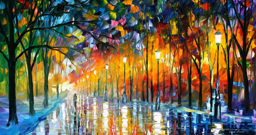

In [7]:
download_url(search_images('Modern painting', max_images=1)[0], 'mod.jpg', show_progress=False)
Image.open('mod.jpg').to_thumb(256,256)
#Paint is also a Label

In [8]:
from itertools import chain, combinations

def get_subsets(s):
    # This function returns all subsets of the given set s
    # Exclude empty set by starting range from 1 instead of 0
    return list(chain(*map(lambda x: combinations(s, x), range(1, len(s)+1))))

# Original set
s = {"Renaissance", "Modern", "Painting", "Photo", "portrait", "building"}

# All subsets
subsets = get_subsets(s)

# Filtered subsets satisfying the conditions
filtered_subsets = []

for subset in subsets:
    subset = set(subset)

    # Condition A: "Renaissance" and "Modern" are mutually exclusive.
    if "Renaissance" in subset and "Modern" in subset:
        continue

    # Condition B: "portrait" and "building" cannot be the single element in a set.
    if (len(subset) == 1) and (("portrait" in subset) or ("building" in subset)):
        continue

    # Condition C: "portrait" and "building" are mutually exclusive.
    if "portrait" in subset and "building" in subset:
        continue

    filtered_subsets.append(subset)

for i, subset in enumerate(filtered_subsets):
    print(f"Subset {i+1}: {subset}")


Subset 1: {'Photo'}
Subset 2: {'Modern'}
Subset 3: {'Painting'}
Subset 4: {'Renaissance'}
Subset 5: {'Photo', 'Modern'}
Subset 6: {'Photo', 'portrait'}
Subset 7: {'building', 'Photo'}
Subset 8: {'Photo', 'Painting'}
Subset 9: {'Photo', 'Renaissance'}
Subset 10: {'Modern', 'portrait'}
Subset 11: {'building', 'Modern'}
Subset 12: {'Painting', 'Modern'}
Subset 13: {'Painting', 'portrait'}
Subset 14: {'Renaissance', 'portrait'}
Subset 15: {'building', 'Painting'}
Subset 16: {'building', 'Renaissance'}
Subset 17: {'Painting', 'Renaissance'}
Subset 18: {'Photo', 'Modern', 'portrait'}
Subset 19: {'building', 'Photo', 'Modern'}
Subset 20: {'Photo', 'Painting', 'Modern'}
Subset 21: {'Photo', 'Painting', 'portrait'}
Subset 22: {'Photo', 'Renaissance', 'portrait'}
Subset 23: {'building', 'Photo', 'Painting'}
Subset 24: {'building', 'Photo', 'Renaissance'}
Subset 25: {'Photo', 'Painting', 'Renaissance'}
Subset 26: {'Painting', 'Modern', 'portrait'}
Subset 27: {'building', 'Painting', 'Modern'}
Sub

In [9]:
path = Path('training_images')

from time import sleep

for i, labelSet in enumerate(filtered_subsets):
  label_combine=' '.join(labelSet)
  dest=(path/label_combine)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(label_combine))
  sleep(10)





Searching for 'Photo'
Searching for 'Modern'
Searching for 'Painting'
Searching for 'Renaissance'
Searching for 'Photo Modern'
Searching for 'Photo portrait'
Searching for 'building Photo'
Searching for 'Photo Painting'
Searching for 'Photo Renaissance'
Searching for 'Modern portrait'
Searching for 'building Modern'
Searching for 'Painting Modern'
Searching for 'Painting portrait'
Searching for 'Renaissance portrait'
Searching for 'building Painting'
Searching for 'building Renaissance'
Searching for 'Painting Renaissance'
Searching for 'Photo Modern portrait'
Searching for 'building Photo Modern'
Searching for 'Photo Painting Modern'
Searching for 'Photo Painting portrait'
Searching for 'Photo Renaissance portrait'
Searching for 'building Photo Painting'
Searching for 'building Photo Renaissance'
Searching for 'Photo Painting Renaissance'
Searching for 'Painting Modern portrait'
Searching for 'building Painting Modern'
Searching for 'Renaissance Painting portrait'
Searching for 'build

In [10]:
# searches = 'Renaissance','Modern','Painting','Photo'
# path = Path('renai_or_mod_or_painting_or_photo')
# # It is A OR B, it is not A or !A, I don't know whether there would be different
# from time import sleep

# for o in searches:
#     dest = (path/o)
#     dest.mkdir(exist_ok=True, parents=True)

#     download_images(dest, urls=search_images(f'{o} photo'))
#     sleep(10)  # Pause between searches to avoid over-loading server
#     download_images(dest, urls=search_images(f'{o} portrait photo'))
#     sleep(10)
#     download_images(dest, urls=search_images(f'{o} building photo'))
#     sleep(10)
#     resize_images(path/o, max_size=400, dest=path/o)



In [11]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


24

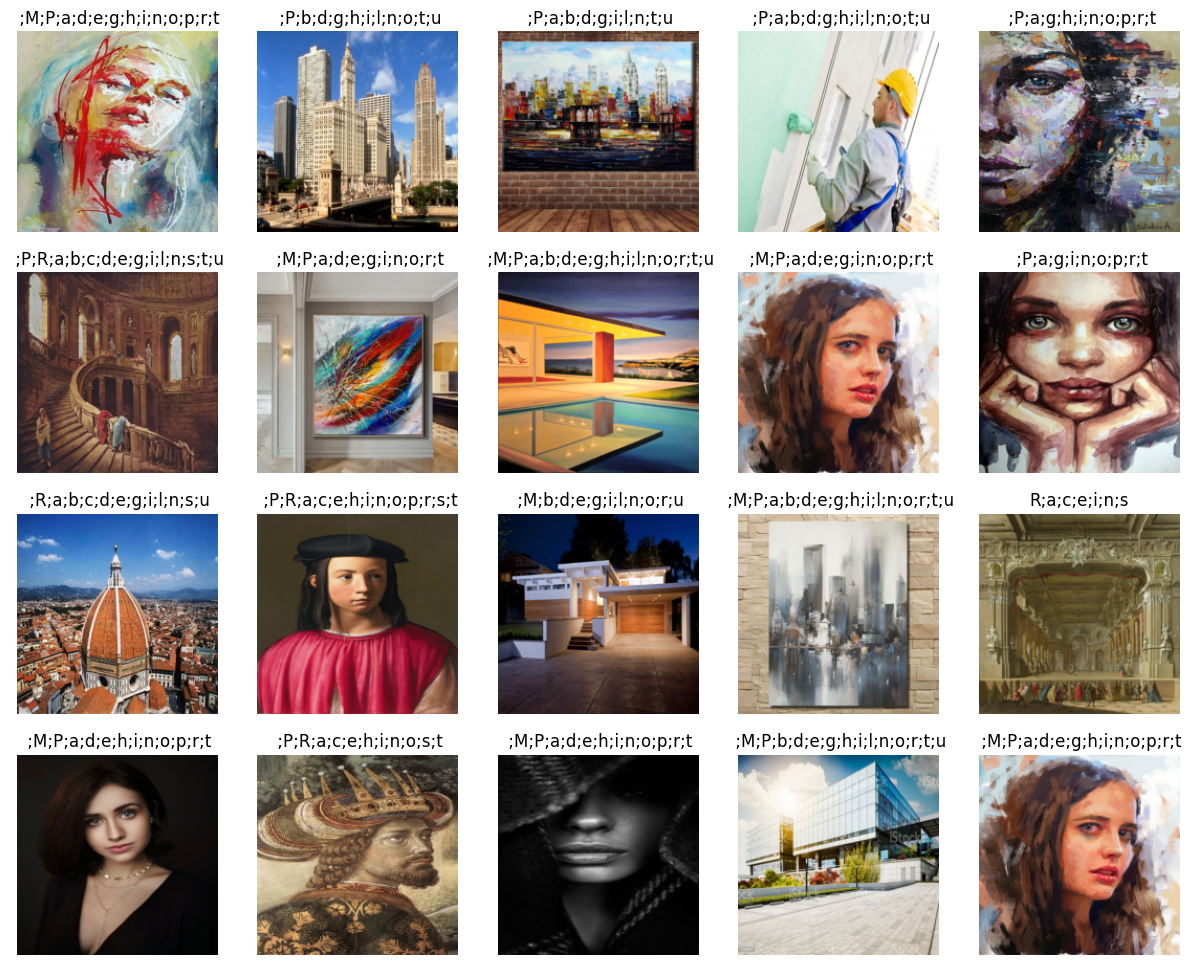

In [12]:
dls = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,  #'parent_label is a convenience function provided by fastai to get the label from the parent folder name of an input item
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)
# A 'DataLoaders object (which includes a training DataLoader and a validation DataLoader) from the data located at path, with a batch size of 32

dls.show_batch(max_n=20)

In [13]:
learn = vision_learner(dls, resnet101, metrics=accuracy_multi)
# https://docs.fast.ai/vision.learner.html
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.666809,0.427876,0.821603,18:10


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.420748,0.314093,0.881250,23:28
1,0.331117,0.266733,0.904891,23:20


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.420748,0.314093,0.881250,23:28
1,0.331117,0.266733,0.904891,23:20
2,0.261665,0.233132,0.908288,23:17
